


# **# Exploratory Data Analysis**
# Python · Car Details Dataset



Most of us prefer to buy used cars for our first car, specially for non-drivers, in order to learn hwo to frive freely without worrying to crash it if it was brand new.

So, here we have a dataset of used cars with their full specs. and selling prices, and we want to conduct an analysis on this sample, in order to make recommendations to customers according to their budget.

In [1]:
import numpy as np # For fast numerical calculations
import matplotlib.pyplot as plt # For making plots
import pandas as pd # Deals with data
import seaborn as sns # Makes beautiful plots
import plotly.express as px # Great library with interacting figures
import warnings
warnings.filterwarnings('ignore') # To ignore warning messages

In [2]:
# Let's put our data into DataFrame:
df = pd.read_csv('/content/CAR DETAILS.csv', sep = ',')

In [3]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


Sometimes with this kind of datasets we might face duplicates which will affect our analysis, so let's remove them, if there are.

In [4]:
df = df.drop_duplicates()

In [5]:
df.shape # Returns our data's dimenstions for more clarity, instead of callin the data all over.

(3577, 8)

As we can see there were duplicate rows indeed.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


Now Let's check for missing values:

In [7]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

Great! There are no missing values.

In [9]:
pd.set_option('display.float_format', lambda x: '%.0f' % x) #To get rid of the "e" exponential notation
df.describe()

,year,selling_price,km_driven
count,3577,3577,3577
mean,2013,473913,69251
std,4,509302,47580
min,1992,20000,1
25%,2010,200000,36000
50%,2013,350000,60000
75%,2016,600000,90000
max,2020,8900000,806599


In [10]:
df.describe(include = "object")

,name,fuel,seller_type,transmission,owner
count,3577,3577,3577,3577,3577
unique,1491,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,54,1800,2832,3265,2218


From the above measurements we deduce the following:

1- There's very high variability in our data in general whether the manufacuring years, prices or even the Kms. driven

2- Most of the cars are in the range (2010 - 2016) years with very minimum no. of newer cars.

3- Customers with budgets in the range of (400,000 - 600,000) can afford most of the cars they want.
4- We have 1491 different car models from different companies, with the "Maruti Swift Dzire VDI" being the most model for sale

5- Diesel cars are the most among the cars for sale, which is not a good thing for most regular consumers due to environmental causes.

6- Most of the cars are of manual transmission, which isn't a good thing for non-driver as learning manual transmission cars is a bit harder than automatic cars which people are tend to get these days.

7- Luckily most of the cars are of first owner, which is a good thing for car seekers.

<Axes: title={'center': 'Correlation Matrix'}>

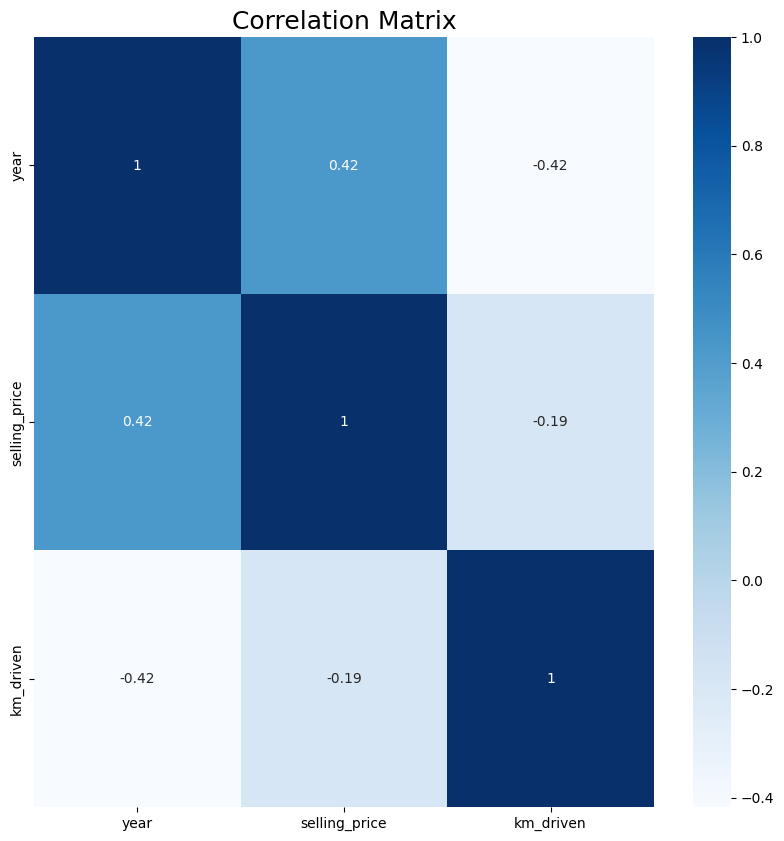

In [11]:
plt.figure(figsize=(10,10))
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='Blues')

From the above graph, we notice that:

1- There's a positive (but not too strong) correlation between the selling prices and the years, which makes perfect sense, as the car become newer its price becomes higher.

2- There's a negative but very weak correlation between the selling prices and the Kms. driven, which also makes perfect sense.

Let's explore these correleations even more:

Text(0, 0.5, 'Selling Price')

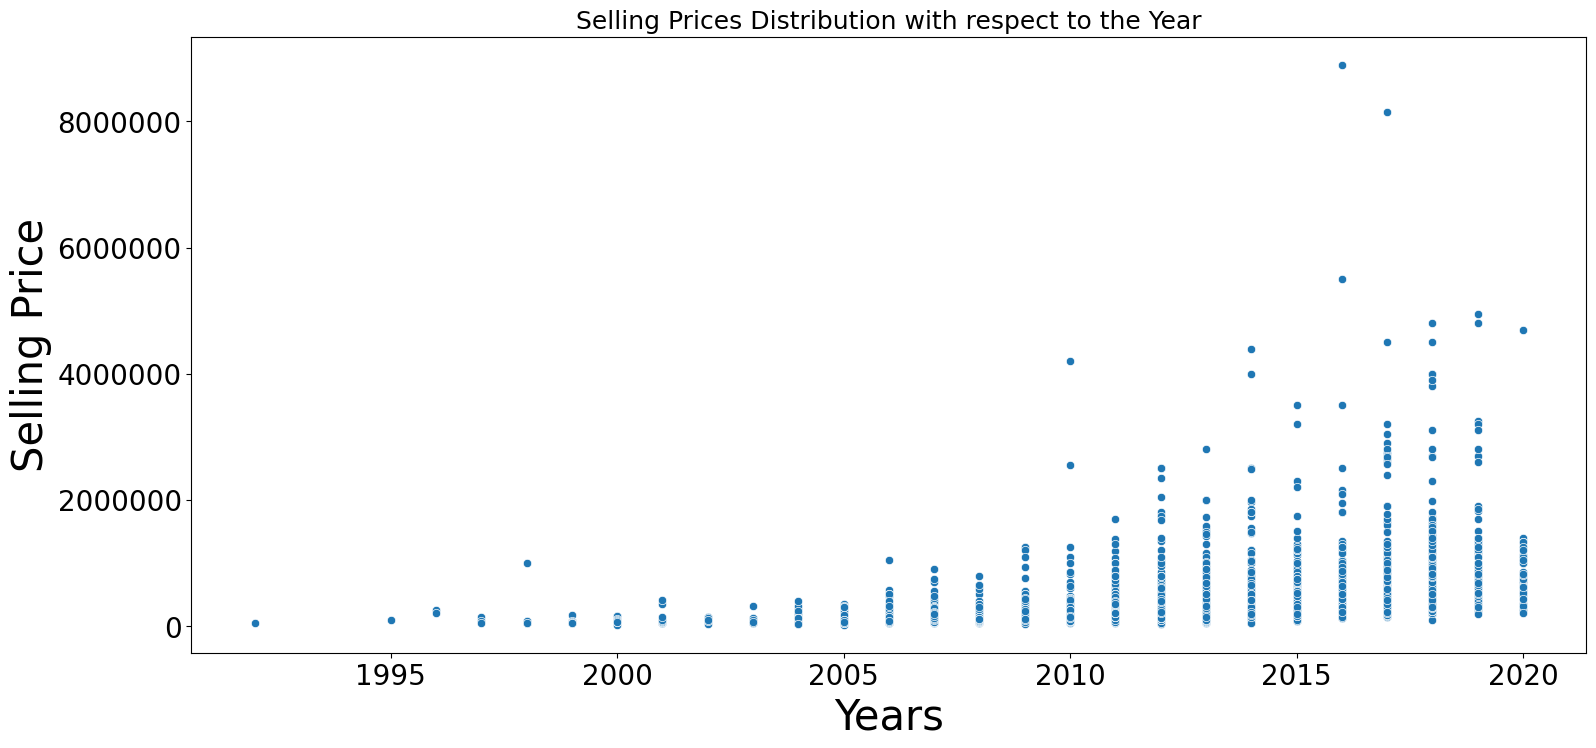

In [12]:
plt.figure(figsize=(18,8))
plt.title('Selling Prices Distribution with respect to the Year', fontsize=18)
sns.scatterplot(data=df, x='year', y='selling_price')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Years",fontsize=30)
plt.ylabel("Selling Price",fontsize=30)

This scatter plot represents the correlation between years and selling prices in a better way.

Text(0, 0.5, 'Km Driven')

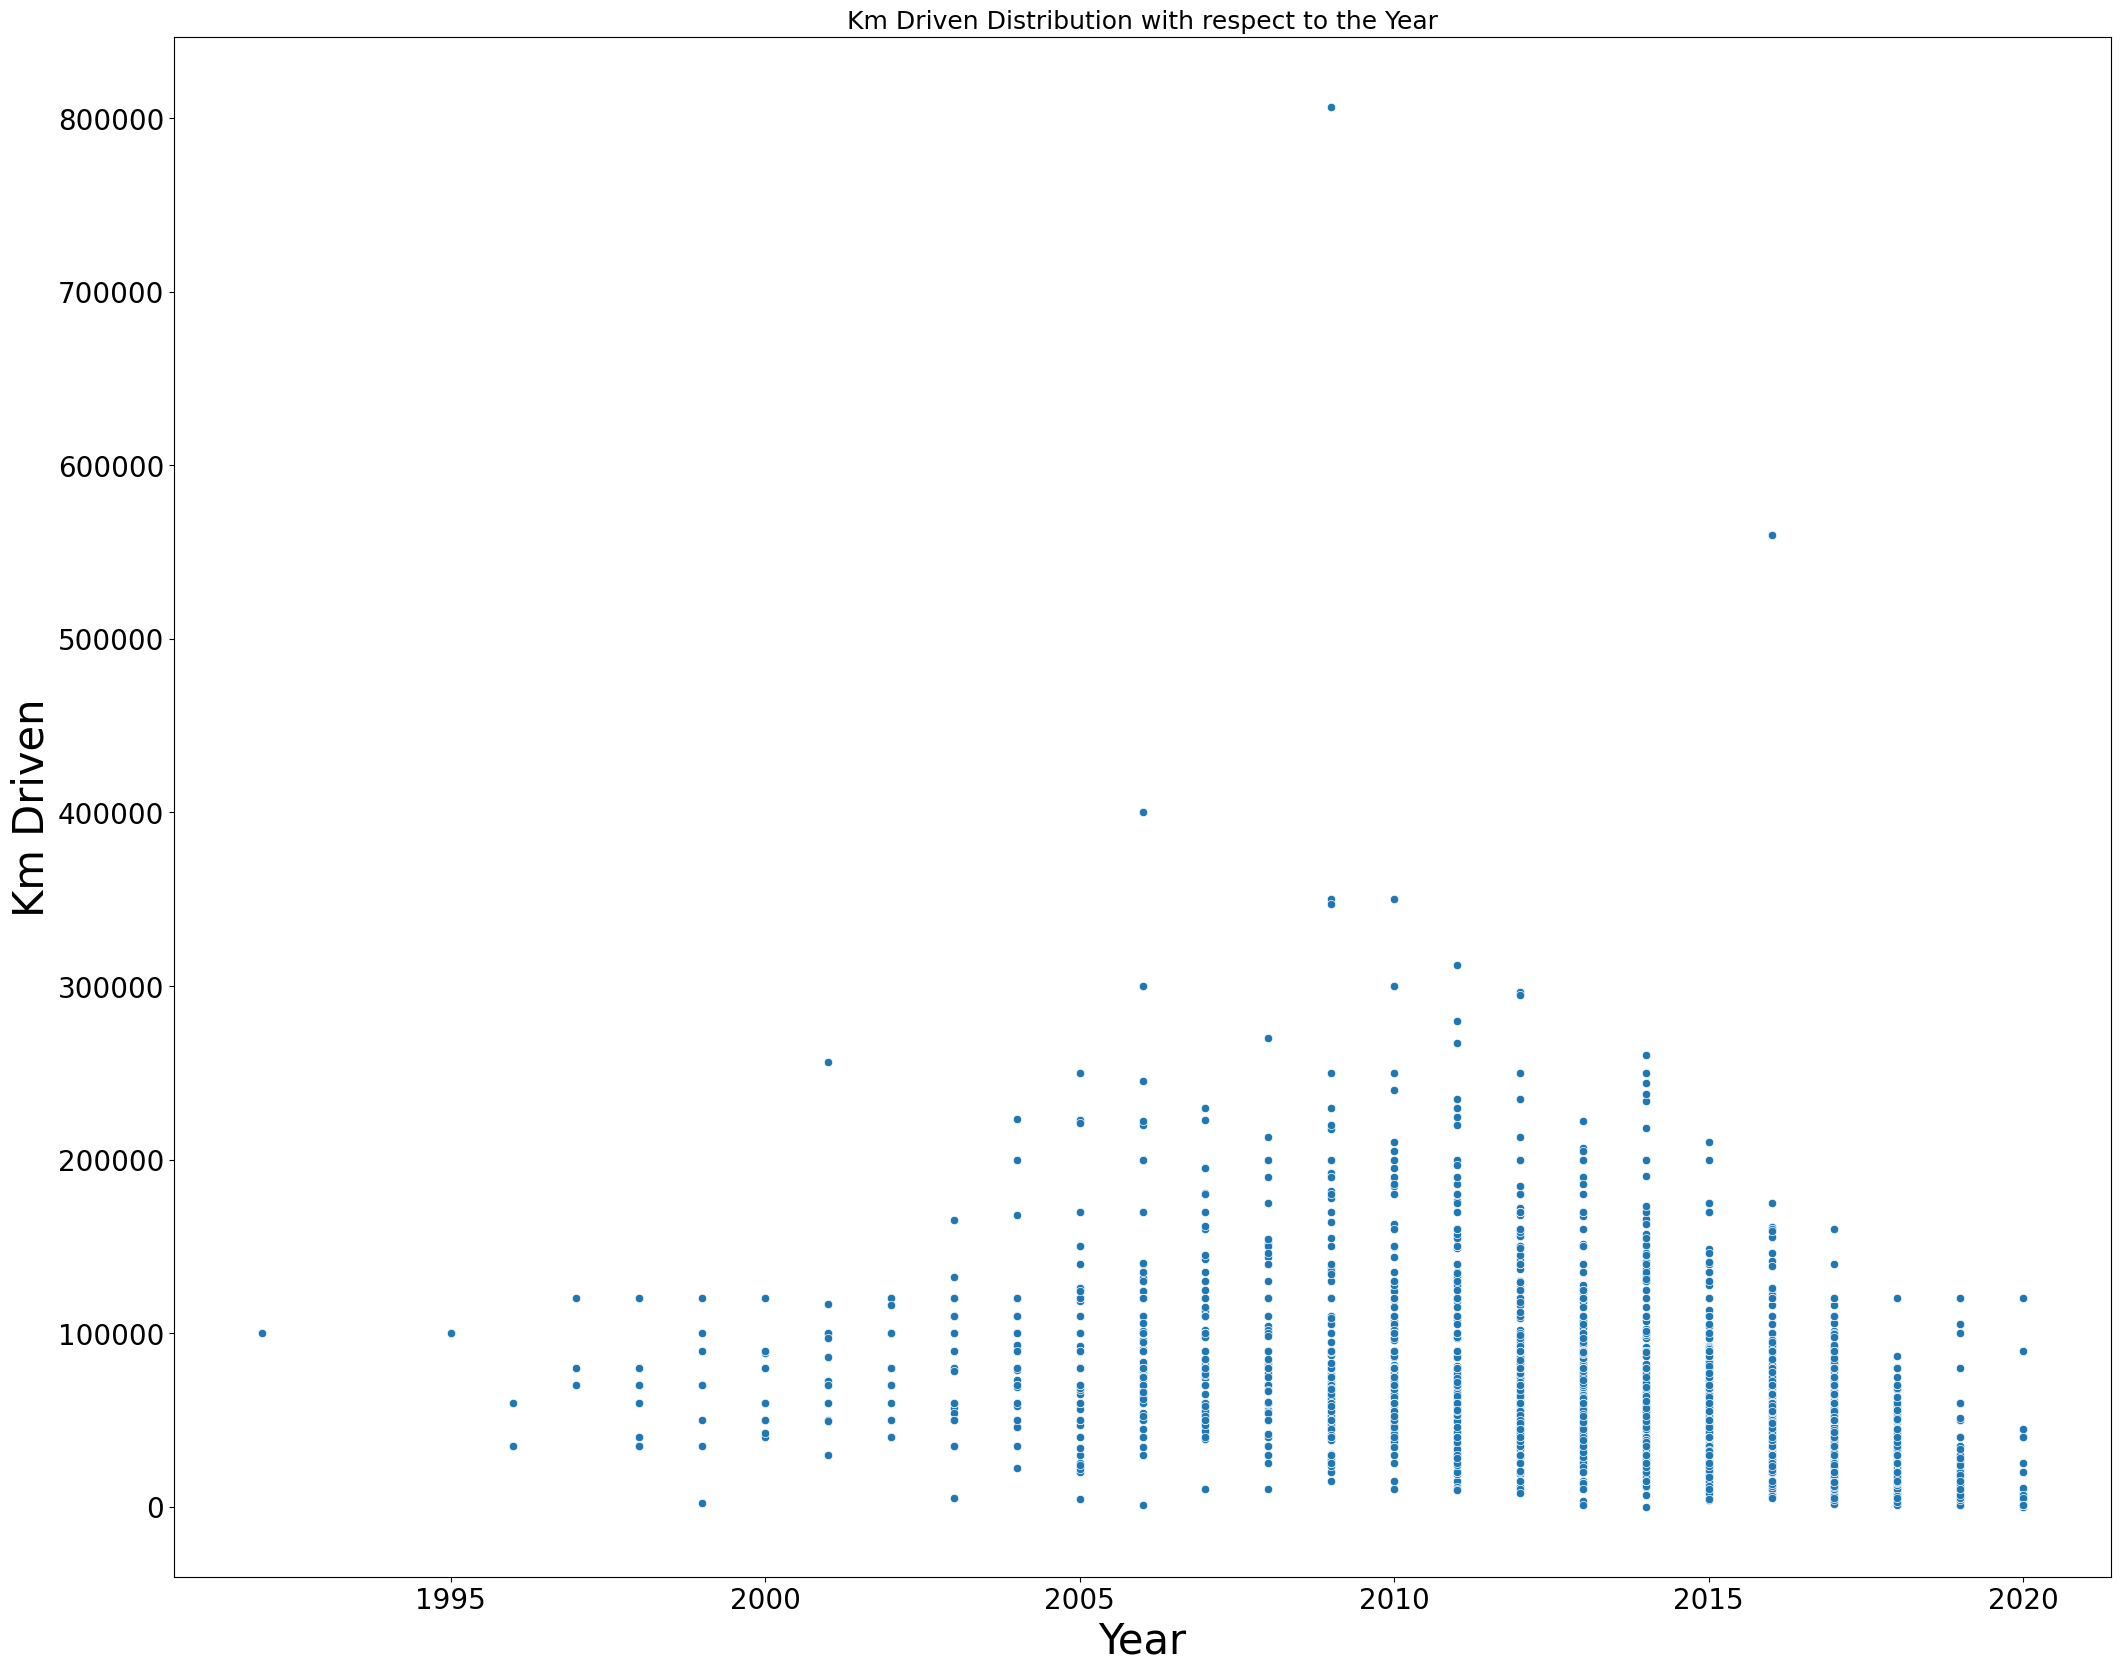

In [13]:
plt.figure(figsize=(25,20))
plt.title('Km Driven Distribution with respect to the Year', fontsize=18)
sns.scatterplot(data=df, x='year', y='km_driven')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Year",fontsize=30)
plt.ylabel("Km Driven",fontsize=30)

Here we can also see the weak negative correlation between years and Kms. driven.

Great! now let's manipulate our data a little bit for easy access:

# We noticed that we have many car models for the same company.

In [14]:
# Split our car names to get only the company name:
df["car name"] = df["name"].apply(lambda x : ' '.join(x.split(' ')[:1]))

In [15]:
 df["car name"].value_counts()

Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Jaguar              5
Mitsubishi          5
Land                5
Volvo               4
Jeep                3
Ambassador          3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: car name, dtype: int64

This list is a bit ugly right? Let's put it on a plot to have a better understanding of our car companies distribution:

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200')])

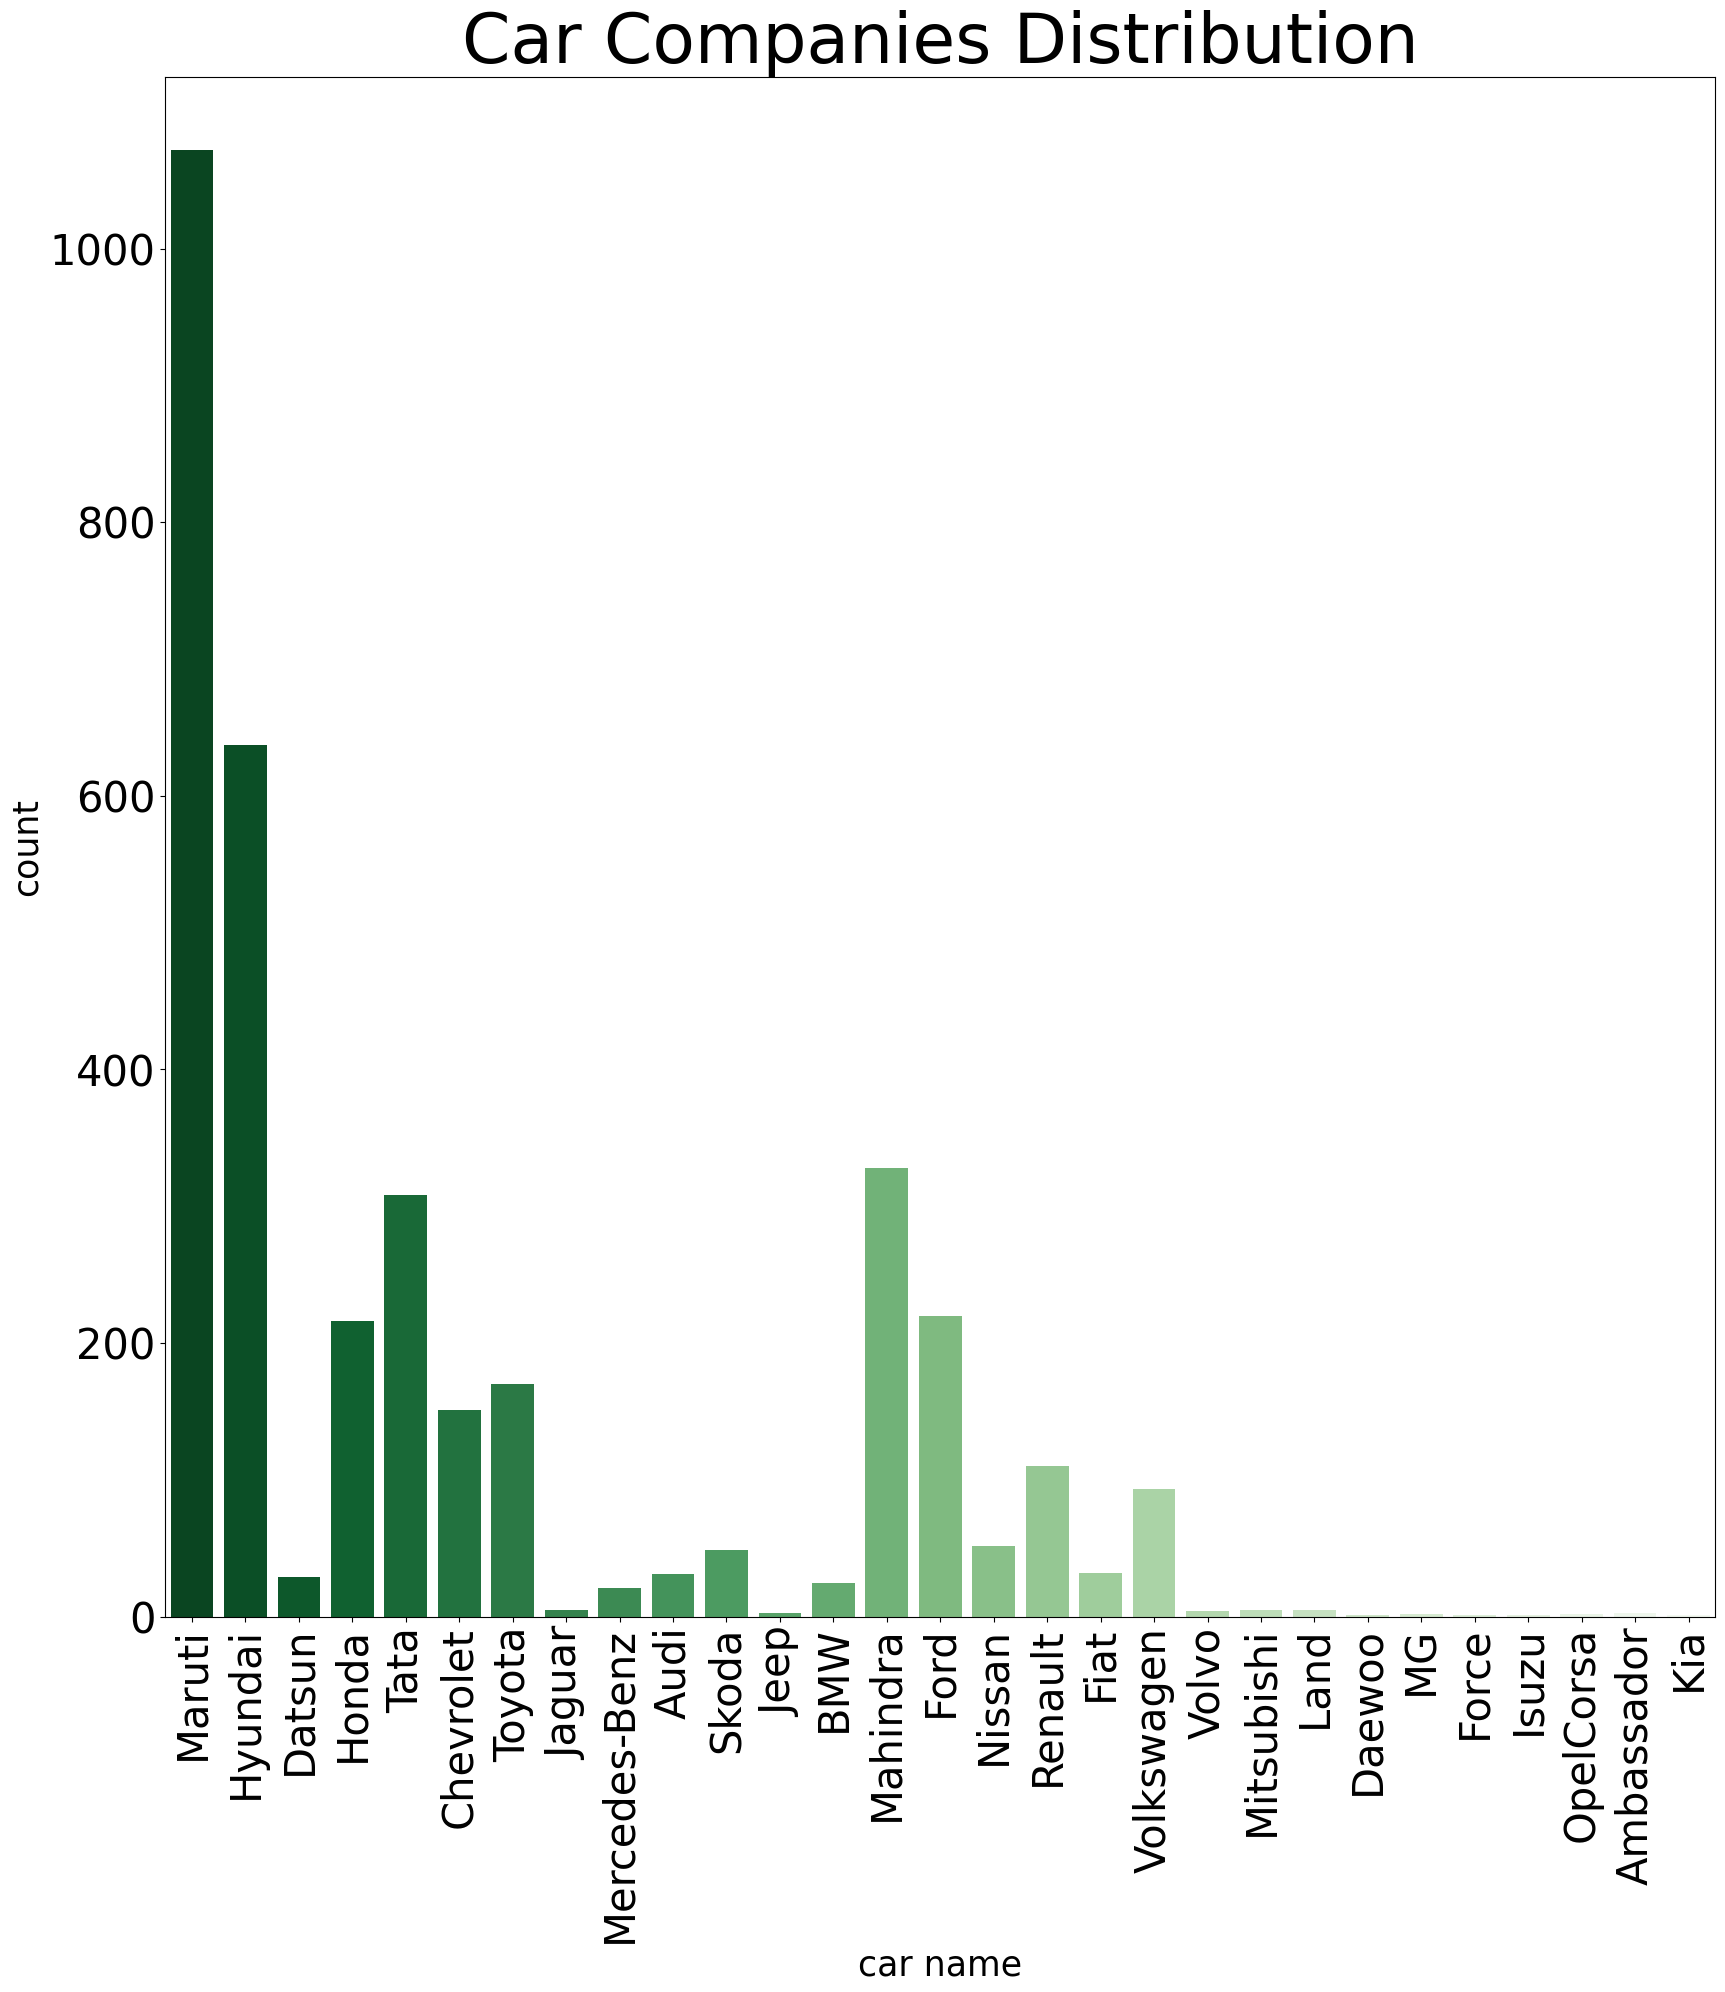

In [16]:
plt.figure(figsize = (20,20))
plt.title('Car Companies Distribution', fontsize=50)
plt.xlabel("Car Name",fontsize=25,color="black")
plt.ylabel("Car Count",fontsize=25,color="black")
plot = sns.countplot(x="car name", data=df,  palette='Greens_r')
plt.xticks(fontsize=30, rotation = 90)
plt.yticks(fontsize=30)

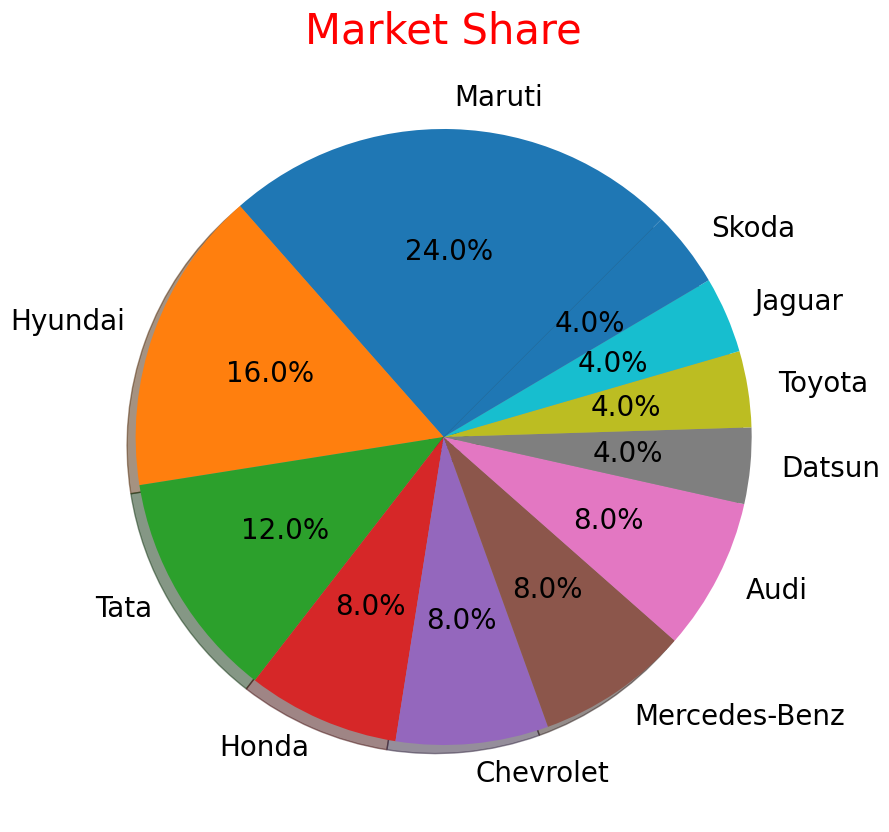

In [17]:
 labels = df["car name"][:25].value_counts().index
sizes = df["car name"][:25].value_counts()
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',shadow=True, startangle=45,textprops={'fontsize':20})
plt.title('Market Share',color = 'red',fontsize = 30)
plt.show()

We can see from the graphs that both companies "Maruti" and "Hyundai" have the biggest market share, and that indicates the reliability of their cars and their major spread accross different budget ranges with the varity of their models.

Also The following companies have a fair market shares:

1- Mahindra

2- Tata

3- Honda
4- Ford

5- Toyota

6- Chevrolet

7- Mercedes-Benz

8- Audi
As we go down on the previuos list we find company cars with fewer models, and hence more restricted budget ranges.

Also, The more the market share, the more possible for the customers to buy the model they want with the best price due to price variability.
Now, we all know that the first thing any one look for is the price even before quality and and the market spread.

So, let's find out how those companies compare with their models from the prices perspective:

In [18]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car name'],
      dtype='object')

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000., 4000000., 4500000.]),
 [Text(0, 0.0, '0'),
  Text(0, 500000.0, '500000'),
  Text(0, 1000000.0, '1000000'),
  Text(0, 1500000.0, '1500000'),
  Text(0, 2000000.0, '2000000'),
  Text(0, 2500000.0, '2500000'),
  Text(0, 3000000.0, '3000000'),
  Text(0, 3500000.0, '3500000'),
  Text(0, 4000000.0, '4000000'),
  Text(0, 4500000.0, '4500000')])

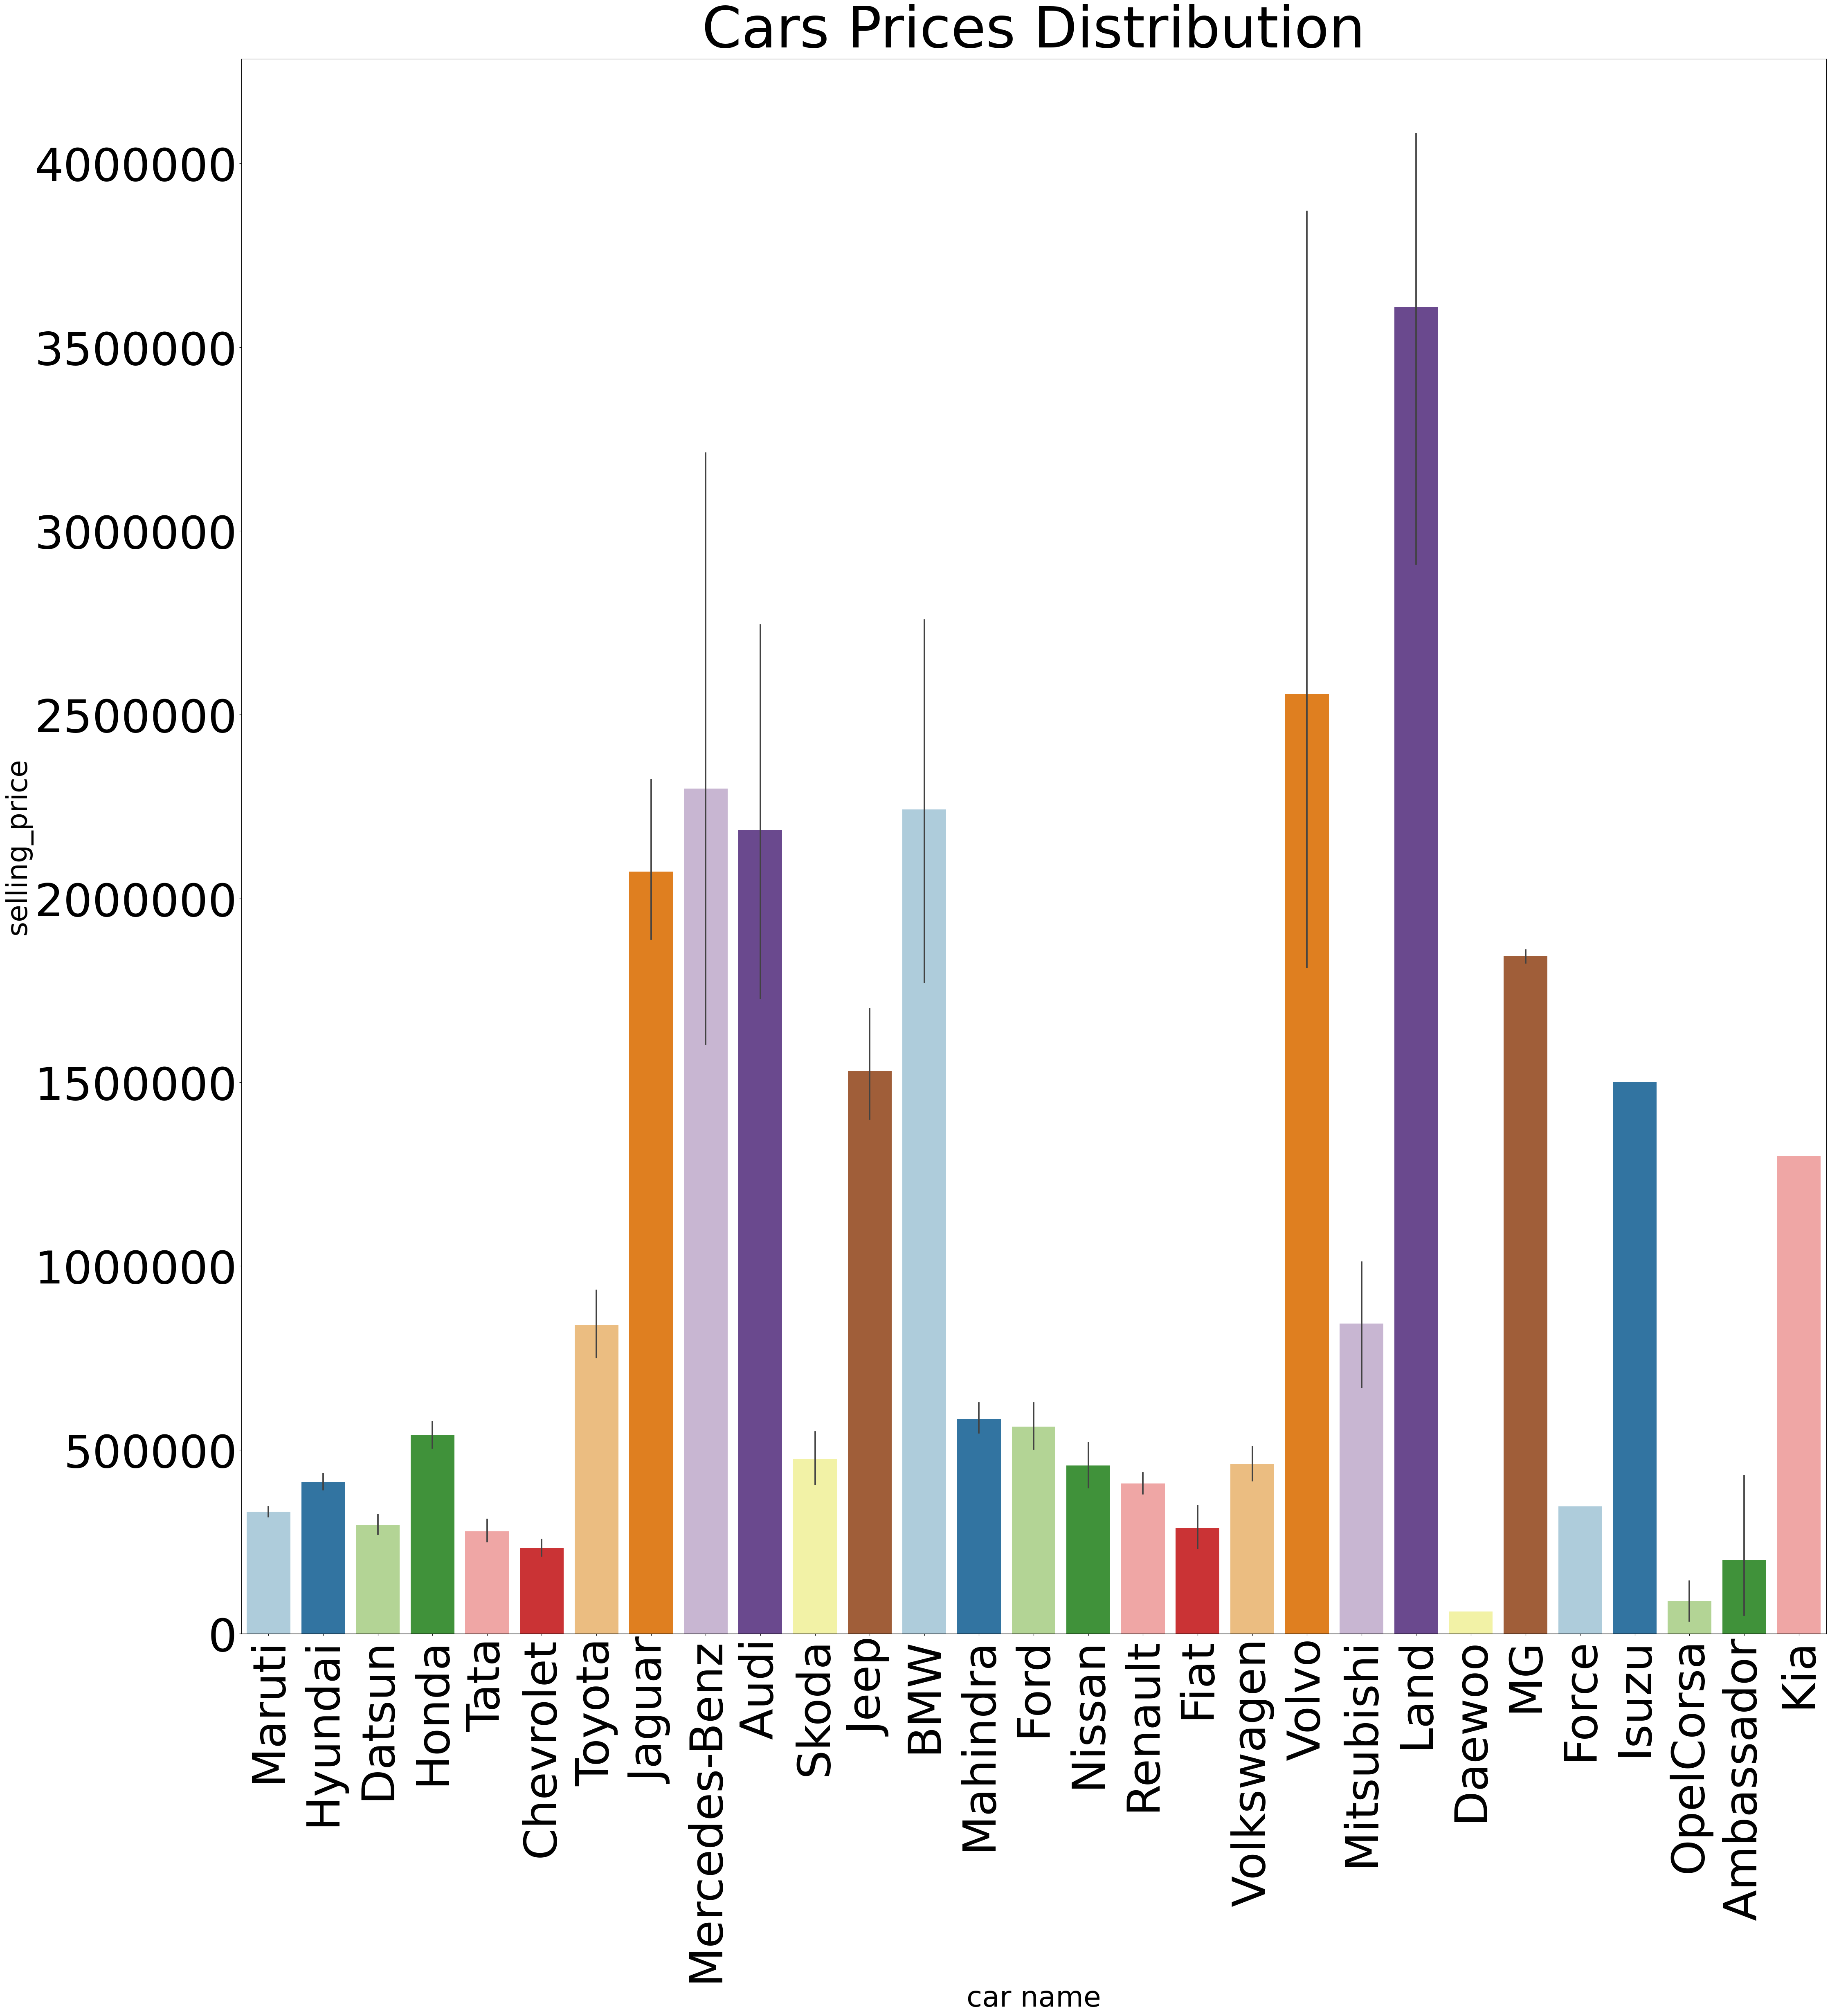

In [19]:
plt.figure(figsize = (50,50))
plt.ticklabel_format(style='plain') # To remove the exponential "e" notation.
plt.title('Cars Prices Distribution', fontsize=100)
plt.xlabel("Car Name",fontsize=50,color="black")
plt.ylabel("Car Price",fontsize=50,color="black")
plot = sns.barplot(x="car name", y = "selling_price", data=df,  palette="Paired")
plt.xticks(fontsize=80, rotation = 90)
plt.yticks(fontsize=80)

From the above plot we can notice that as we suspected the car companies with the biggest market shares have also the best prices and budget ranges, while car companies with low market shares have high prices and hence expensive spare parts for their different models, and reselling those cars in the future will be very hard.



# **Conclusion:**

1- For budget ranges around 500,000 and below, it's advisable to buy from one of the following companies:

1- Maruti

2- Hyundai

3- honda

4- Mahindra

5- Ford

2- For budget ranges higher than 500,000 but lower than 1,000,000, it's advisable to buy from one of the following companies:
1- Toyota

2- Mitsubishi

3- For luxury cars and those for people who don't bother much about their budgets, it's advisable to buy from one of the following companies:

1- Mercedes-Benz

2- BMW

3- Jaguar

4 - Audi